### Bet Sizing

This notebook will cover exercise answer.

* Exercise 10.1
* Exercise 10.2
* Exercise 10.3
* Exercise 10.4
* Exercise 10.5
* Exercise 10.6
* Exercise 10.7

> In the first sense, probability means the degree of belief or approvability of an opinion—the gut view of probability. Scholars use the term “epistemological” to convey this meaning; epistemological refers to the limits of human knowledge not fully analyzable
>
> &mdash; Peter L. Bernstein, Against the Gods: The Remarkable Story of Risk

The key difference between gambling and investment is how risks are controlled.

In this exercise, we are translating probabilities into bets!

Most of the functions below can be found under:

* Tool/risk_mgmt 
* Sample_data/make_data

If you are keen on generating synthetic data for your research, copy the code snippets [Generate synthetic raw data](https://gist.github.com/boyboi86/5e00faf48f60abfdbe838fbdee269471) in my gist.


Contact: boyboi86@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import research as rs

%matplotlib inline

Num of CPU core:  4
Machine info:  Windows-10-10.0.18362-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy 1.18.5
Pandas 1.0.4


C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x800 with 1 Axes>

In [2]:
n_samples = 10000
min_prob = 1e-3 #by right we should used [-1,0], but to avoid -inf and error msg we use something else
max_prob = 1.
class_labels = np.arange(2,11)
steps = [0.01, 0.05, 0.1]

X =  rs.make_randomt1_data(n_samples=n_samples,
                           max_days = 25.,
                           Bdate = False) # True = business days only

X["prob"] = np.linspace(start = min_prob, 
                            stop = max_prob,
                            num = n_samples,
                            endpoint = False)

X #quick check!

,t1,prob
1993-01-27 15:40:01.721597,1993-02-08 23:56:25.588936,0.001000
1993-01-28 15:40:01.721597,1993-02-12 20:51:34.323004,0.001100
1993-01-29 15:40:01.721597,1993-02-15 23:15:03.187772,0.001200
1993-01-30 15:40:01.721597,1993-02-13 09:54:50.457400,0.001300
1993-01-31 15:40:01.721597,1993-02-16 05:43:37.346479,0.001400
...,...,...
2020-06-09 15:40:01.721597,2020-06-17 06:51:46.147162,0.999501
2020-06-10 15:40:01.721597,2020-06-22 00:25:50.751314,0.999600
2020-06-11 15:40:01.721597,2020-06-15 18:58:38.229291,0.999700
2020-06-12 15:40:01.721597,2020-07-06 03:10:16.207578,0.999800


**Note:**

Your below graphs will contain 0 value if your Bdate = True (I offset weekends, so there will be a consistent 3 day breaks).

As a result, the algo detected missing dates (While all trades based on investigation did close before new signal generation, as a result no trades were active cause 0 values, conincidentally all of them were Mondays).

    X1[X1 == 0].index.dayofweek
    
In practice, we will have weekends and data restructuring. As a result, we might end up with 2 - 3 days absent from our dataset. 

During implementation of the below algo, additional measure has to be taken to mitigate the impact from such events (These breaks will be reflected).

Try offset with business days instead of daily frequency, using the above algo (Bdate = True), to see the difference in your graph.

**Note:**

These algo will most likely be used with triple barriers technique, hence able to cross-reference with other quantitative strategies as well.

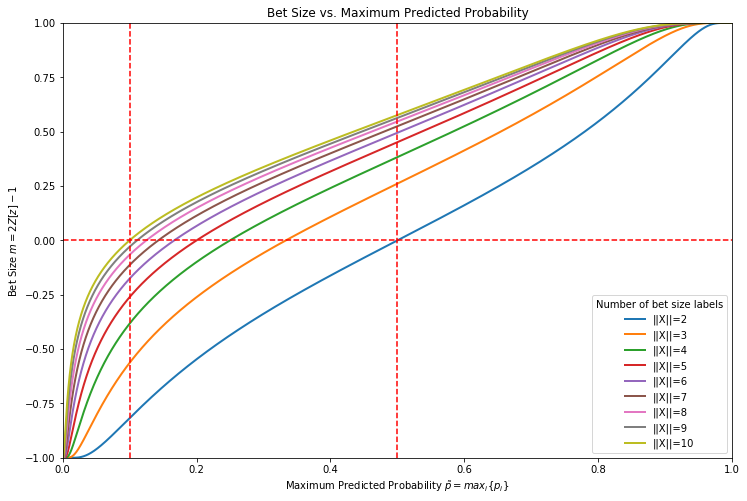

In [3]:
plt.figure(figsize=(12,8))
for cls in class_labels:
    
    X["Z_score"] = X["prob"].apply(lambda prob: (prob - 1/cls) / (prob * (1 - prob))**0.5)
    X["bet_size_prob"] = X["Z_score"].apply(lambda x: 2 * norm.cdf(x) - 1)
    plt.plot(X["prob"],X["bet_size_prob"], label=f"||X||={cls}", linewidth=2, alpha=1)
    
plt.ylim(-1, 1)
plt.xlim(0, 1) #our lowest was only 1e-3, not negative
plt.axhline(y=0, c='r',ls='--')
plt.axvline(x=0.1, c='r',ls='--') # predict prob = 0.1
plt.axvline(x=0.5, c='r',ls='--') # predict prob = 0.5
plt.ylabel("Bet Size $m=2Z[z]-1$")
plt.xlabel(r"Maximum Predicted Probability $\tilde{p}=max_i${$p_i$}")
plt.title("Bet Size vs. Maximum Predicted Probability")
plt.legend(title="Number of bet size labels")
plt.show()

**Note**

Given a range of initial probabilities from 0 to 1.0.

Notice how multi-labels/ multi-classes affects the rate of convergence in the above, based on one-vs-rest method.

The range of maximum predicted probabilities is around 0.1 to 0.5 (Refer to red dotted line).

The larger the classes, the lower prediction probability required to pass hypothesis. (1/k to be exact)

**Note**

In the previous exercises, we usually have binary classes. But for one-vs-rest method, the concept is different.

[ML Mastery: One-vs-Rest](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)

Took me a while to realized the difference.

[1993-01-27 15:40:01.721597   -0.903514
1993-01-28 15:40:01.721597   -0.768794
1993-01-29 15:40:01.721597   -0.843470
1993-01-30 15:40:01.721597   -0.808998
1993-01-31 15:40:01.721597   -0.800117
                                ...   
2002-03-20 19:02:58.333200   -0.223279
2002-03-21 15:40:01.721597   -0.225933
2002-03-21 21:49:44.990541   -0.225819
2002-03-22 11:45:09.342393   -0.224229
2002-03-22 15:40:01.721597   -0.219374
Length: 6667, dtype: float64] this out


[1993-01-27 15:40:01.721597   -0.903514
1993-01-28 15:40:01.721597   -0.768794
1993-01-29 15:40:01.721597   -0.843470
1993-01-30 15:40:01.721597   -0.808998
1993-01-31 15:40:01.721597   -0.800117
                                ...   
2002-03-20 19:02:58.333200   -0.223279
2002-03-21 15:40:01.721597   -0.225933
2002-03-21 21:49:44.990541   -0.225819
2002-03-22 11:45:09.342393   -0.224229
2002-03-22 15:40:01.721597   -0.219374
Length: 6667, dtype: float64, 2002-03-23 09:10:47.199515   -0.218028
2002-03-23 15:40:01.721597   -0.218462
2002-03-23 15:46:35.627018   -0.215000
2002-03-23 15:51:11.997207   -0.217298
2002-03-24 15:40:01.721597   -0.217344
                                ...   
2011-05-03 16:10:20.951451    0.189963
2011-05-04 11:00:39.678202    0.184513
2011-05-04 15:40:01.721597    0.191291
2011-05-05 15:40:01.721597    0.196173
2011-05-06 12:37:32.545430    0.198403
Length: 6667, dtype: float64] this out


[1993-01-27 15:40:01.721597   -0.903514
1993-01-28 15:40:01.721597   -0.768794
1993-01-29 15:40:01.721597   -0.843470
1993-01-30 15:40:01.721597   -0.808998
1993-01-31 15:40:01.721597   -0.800117
                                ...   
2002-03-20 19:02:58.333200   -0.223279
2002-03-21 15:40:01.721597   -0.225933
2002-03-21 21:49:44.990541   -0.225819
2002-03-22 11:45:09.342393   -0.224229
2002-03-22 15:40:01.721597   -0.219374
Length: 6667, dtype: float64, 2002-03-23 09:10:47.199515   -0.218028
2002-03-23 15:40:01.721597   -0.218462
2002-03-23 15:46:35.627018   -0.215000
2002-03-23 15:51:11.997207   -0.217298
2002-03-24 15:40:01.721597   -0.217344
                                ...   
2011-05-03 16:10:20.951451    0.189963
2011-05-04 11:00:39.678202    0.184513
2011-05-04 15:40:01.721597    0.191291
2011-05-05 15:40:01.721597    0.196173
2011-05-06 12:37:32.545430    0.198403
Length: 6667, dtype: float64, 2011-05-06 15:40:01.721597    0.198430
2011-05-07 15:40:01.721597    0.196955
201

2020-06-13 15:41:09.746708 100.0% _avg_active_signals done after 0.96 mins. Remaining 0.0 mins.


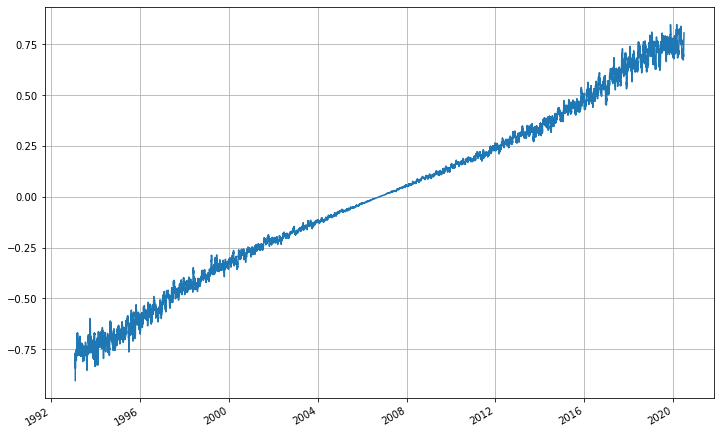

In [4]:
X["Z_score"] = X["prob"].apply(lambda prob: (prob - 1/2) / (prob * (1 - prob))**0.5)
X["bet_size_prob"] = X["Z_score"].apply(lambda x: 2 * norm.cdf(x) - 1)
predict_prob = np.random.uniform(0.5, 1., n_samples) #your ave bet size will hit negative if pred/ prob is below 0.5
X['pred'] = pd.Series(predict_prob, index = X.index)
X['signal'] = X['pred'].mul(X['bet_size_prob'])

sig = rs.avg_active_signals(signals = X, num_threads = 3)

sig[:-1].plot(figsize=(12,8), grid=True) #plot graph

**Note**

Based on the probabilities from 1e-3 to 1. (That is why started from negative 0.75)

The above graph demostrates average bet sizing. In practice, it would look more like a stationary series. Since, it's quite difficult to have an ascending probabilties from 1e-3 to 1.

**Note**

During implementation for this algo, try to revert to pandas "apply". Some of the syntax, does not behave as expected.

[2002-03-23 09:10:47.199515    0.507973
2002-03-23 15:40:01.721597    0.507406
2002-03-23 15:46:35.627018    0.477323
2002-03-23 15:51:11.997207    0.498401
2002-03-24 15:40:01.721597    0.494204
                                ...   
2011-05-03 16:10:20.951451    0.273756
2011-05-04 11:00:39.678202    0.229481
2011-05-04 15:40:01.721597    0.288255
2011-05-05 15:40:01.721597    0.327345
2011-05-06 12:37:32.545430    0.345389
Length: 6667, dtype: float64] this out
[2002-03-23 09:10:47.199515    0.507973
2002-03-23 15:40:01.721597    0.507406
2002-03-23 15:46:35.627018    0.477323
2002-03-23 15:51:11.997207    0.498401
2002-03-24 15:40:01.721597    0.494204
                                ...   
2011-05-03 16:10:20.951451    0.273756
2011-05-04 11:00:39.678202    0.229481
2011-05-04 15:40:01.721597    0.288255
2011-05-05 15:40:01.721597    0.327345
2011-05-06 12:37:32.545430    0.345389
Length: 6667, dtype: float64, 1993-01-27 15:40:01.721597    0.748351
1993-01-28 15:40:01.721597    0.

2020-06-13 15:42:11.130630 100.0% _avg_active_signals done after 0.98 mins. Remaining 0.0 mins.


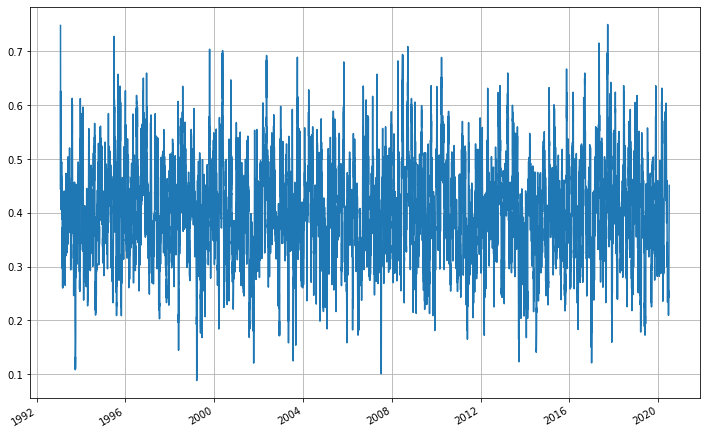

In [5]:
sig = rs.get_signal(events= X,
                   prob = X['pred'], #now we apply random uniform 0.5 - 1
                   pred=X['pred'], #now we apply random uniform 0.5 - 1.
                   n_classes = 2.,
                   discretization = False,
                   step_size = 1,
                   num_threads = 3)

sig[:-1].plot(figsize=(12,8), grid=True)

**Note**

The above graph demostrates average bet sizing. As mentioned earlier on, it should look like a stationary series as long as the initial probability is >= 1/k.

The average bet size will be part of your executed nominal amount based on triple barrier algo.

Another assumption for the above "stationary graph" all long no short. Which we will change later.

[1993-01-27 15:40:01.721597   -0.748351
1993-01-28 15:40:01.721597   -0.304666
1993-01-29 15:40:01.721597   -0.534052
1993-01-30 15:40:01.721597   -0.339145
1993-01-31 15:40:01.721597   -0.342751
                                ...   
2002-03-20 19:02:58.333200    0.152889
2002-03-21 15:40:01.721597    0.089427
2002-03-21 21:49:44.990541    0.065227
2002-03-22 11:45:09.342393    0.022507
2002-03-22 15:40:01.721597    0.022036
Length: 6667, dtype: float64] this out
[1993-01-27 15:40:01.721597   -0.748351
1993-01-28 15:40:01.721597   -0.304666
1993-01-29 15:40:01.721597   -0.534052
1993-01-30 15:40:01.721597   -0.339145
1993-01-31 15:40:01.721597   -0.342751
                                ...   
2002-03-20 19:02:58.333200    0.152889
2002-03-21 15:40:01.721597    0.089427
2002-03-21 21:49:44.990541    0.065227
2002-03-22 11:45:09.342393    0.022507
2002-03-22 15:40:01.721597    0.022036
Length: 6667, dtype: float64, 2011-05-06 15:40:01.721597    0.131440
2011-05-07 15:40:01.721597    0.

[1993-01-27 15:40:01.721597   -0.748351
1993-01-28 15:40:01.721597   -0.304666
1993-01-29 15:40:01.721597   -0.534052
1993-01-30 15:40:01.721597   -0.339145
1993-01-31 15:40:01.721597   -0.342751
                                ...   
2002-03-20 19:02:58.333200    0.152889
2002-03-21 15:40:01.721597    0.089427
2002-03-21 21:49:44.990541    0.065227
2002-03-22 11:45:09.342393    0.022507
2002-03-22 15:40:01.721597    0.022036
Length: 6667, dtype: float64, 2011-05-06 15:40:01.721597    0.131440
2011-05-07 15:40:01.721597    0.111657
2011-05-07 17:30:25.136071    0.105298
2011-05-07 21:58:01.145489    0.110135
2011-05-08 03:11:41.942935    0.035168
                                ...   
2020-06-22 00:25:50.751314   -0.162211
2020-06-22 15:18:51.473502   -0.118997
2020-06-24 21:13:23.023737   -0.132750
2020-06-30 10:42:20.563129   -0.451013
2020-07-06 03:10:16.207578    0.000000
Length: 6666, dtype: float64, 2002-03-23 09:10:47.199515   -0.017544
2002-03-23 15:40:01.721597   -0.045825
200

2020-06-13 15:43:13.797457 100.0% _avg_active_signals done after 1.0 mins. Remaining 0.0 mins.


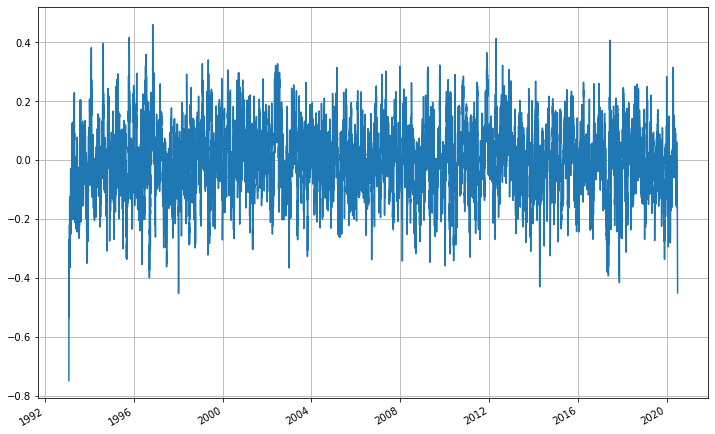

In [6]:
X['side'] = pd.Series(1., index = X.index)
X['side'] = [1 if x%2 == 0 else -1 for x in X['side'].cumsum()] #cheat code for trying to mimic real datasets
sig1 = rs.get_signal(events= X,
               step_size = 1,
               prob = X['pred'], #now we apply random uniform 0.5 - 1
               pred=X['pred'], #now we apply random uniform 0.5 - 1.
               n_classes = 2.,
               discretization = False,
               num_threads = 3)

sig1[:-1].plot(figsize=(12,8), grid=True)

**Note**

We synthetically create "sides" based on the below function, which resulted in 50% of shorting position while the rest will be long. As seen above, most of the average bets are below 0.

    X['side'] = [1 if x%2 == 0 else -1 for x in X['side'].cumsum()]

You will need to have both long and short positions to fit 2 gaussians distributions later.

**Note**

If you do mean-reversion with long/ short style, it will be something like the above.

Notice that average bet size can go below 0? I can almost guarantee the above series most likely can pass ADF.

2020-06-13 15:43:49.974368 _co_position done after 0.59 mins


max ln events: 12,
 max sh events: 11


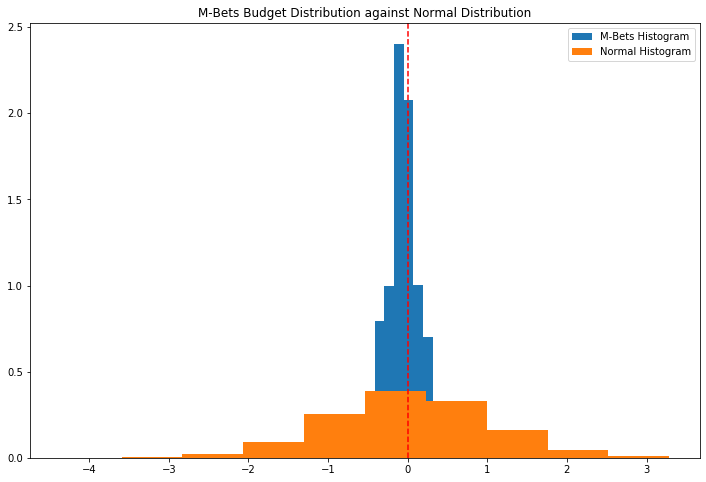

In [7]:
df0 = rs.co_bets_size(events = X,
                      side = X['side'],
                      budget = True,
                      num_threads = 1)

random_x = np.random.normal(0, 1, 10000)
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df0.m, density=True, label = 'M-Bets Histogram')
ax.hist(random_x, density=True, label = 'Normal Histogram')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Budget Distribution against Normal Distribution")
plt.legend()
plt.show()

**Note**

The above Density histogram (Similar to KDE) were plotted using budget method.

Based on the initial long short ratio. m bet seems to be more negative, as compared to normal distribution.

Displayed vastly different kurtosis and skewness. 

Looks like extreme T-distribution (Tall and Narrow), seems very bias to me.

**Note**

The below density histogram is obviously less bias but demostrates high variance (Accuracy). 

Looks like Negative Extreme Small Values Distribution (ESV/ Fat-tail distribution), seems inaccurate to me.

However the below density histogram is only sum of all concurrent positions. 

We will need to fit a [mixture](http://wiki.analytica.com/Mixture_distribution) 2 guassians using EF3M algorithm on the below.

2020-06-13 15:44:26.286900 _co_position done after 0.60 mins


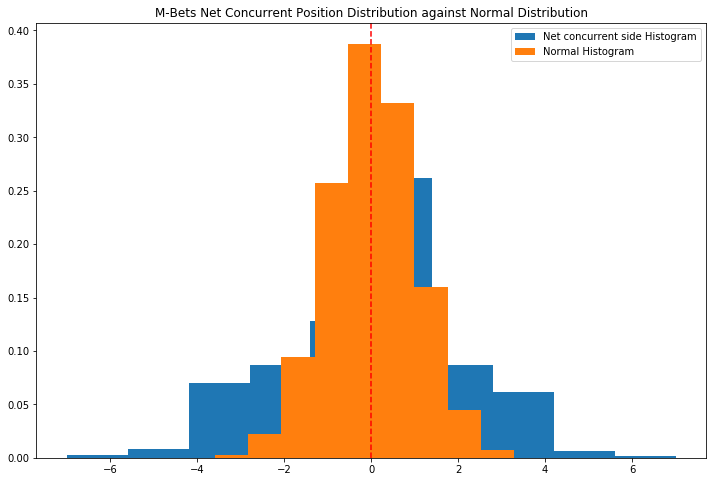

In [8]:
# Exercise 10.4
df1 = rs.co_bets_size(events = X,
                      side = X['side'],
                      budget = False,
                      num_threads = 1)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df1.c_t, density=True, label = 'Net concurrent side Histogram')
ax.hist(random_x, density=True, label = 'Normal Histogram')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Net Concurrent Position Distribution against Normal Distribution")
plt.legend()
plt.show()

**Before you begin the EF3M algorithm implementation:**
 
Please finish their [research paper (Macros and Foreman [2014])](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1931734).

Some reference for you after you completed reading their research paper.
 
1. Moments are what describe the distribution [3 Moments wiki](https://en.wikipedia.org/wiki/Moment_(mathematics))
2. You need to have both long and short positions to continue
3. We are running a Monte-Carlos simulation, be prepared to use multiprocessing (parallelization)
4. Raw moments are from origin, central moments are from mean

C:\Users\Wei_X\Desktop\Python\research\Risk_mgmt\ef3m.py:86: RuntimeWarning: invalid value encountered in double_scalars
  mu2 = ( a - 3 * sig_2**2)**.5
C:\Users\Wei_X\Desktop\Python\research\Risk_mgmt\ef3m.py:84: RuntimeWarning: invalid value encountered in double_scalars
  sig_1 = ((mts[1] - sig_2**2 - mu2**2) / p1 + sig_2**2 + mu2**2 - mu1**2)**(.5)
C:\Users\Wei_X\Desktop\Python\research\Risk_mgmt\ef3m.py:82: RuntimeWarning: invalid value encountered in double_scalars
  (p1-1))) / (3 * (1 - p1) * (mu2 - mu1)))**(.5)
C:\Users\Wei_X\Desktop\Python\research\Risk_mgmt\ef3m.py:85: RuntimeWarning: invalid value encountered in double_scalars
  a = (6 * sig_2**4 + (mts[3] - p1 * (3 * sig_1**4 + 6 * sig_1**2 * mu1**2 + mu1**4))/ (1 - p1))**.5
2020-06-13 15:44:30.947878 _mts_loop done after 0.07 mins


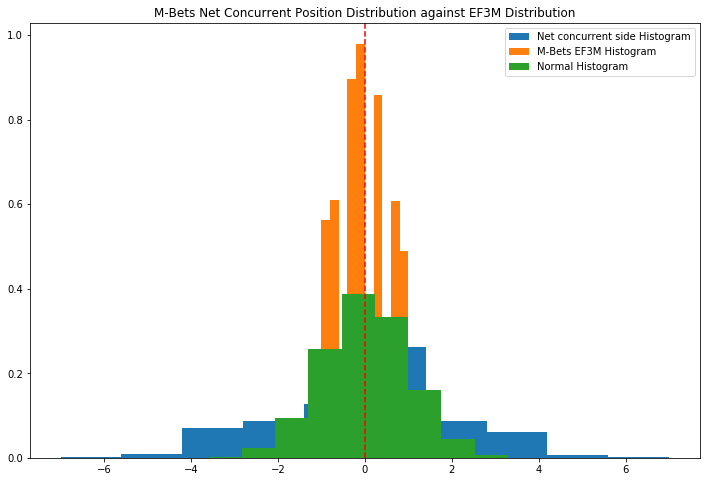

In [9]:
r_mts = [np.mean(df1.c_t ** r) for r in np.arange(1,6)] # moments ard origin

epsilon=1e-2 #by right, this should be 1e-5 but it will also mean 10,000 loops
factor=5 # this is the ‘lambda’ referred in the paper
variant = 1

d1 = rs.mts_fit(mts = r_mts,
                epsilon = epsilon,
                factor = 5,
                variant = variant,
                n_run = 10,
                f_params = True,
                num_threads = 1)

df1 = rs.m_bet_EF3M(data = df1, param = d1)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(df1.c_t, density=True, label = 'Net concurrent side Histogram')
ax.hist(df1.m, density=True, label = 'M-Bets EF3M Histogram')
ax.hist(random_x, density=True, label = 'Normal Histogram')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Net Concurrent Position Distribution against EF3M Distribution")
plt.legend()
plt.show()

**Note**

After applying EF3M algo for bet-sizing, the bet size also looks bias as well

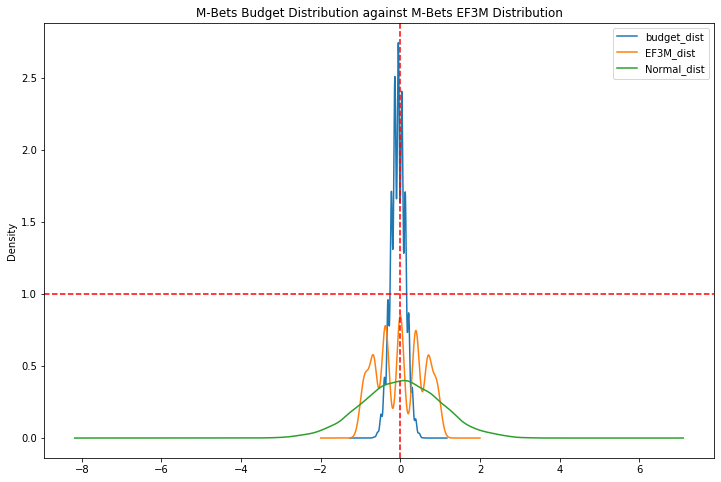

In [10]:
com_df = pd.DataFrame({'budget_dist': df0.m, 'EF3M_dist': df1.m, 'Normal_dist': random_x})
com_df.plot.kde(figsize = (12,8))
plt.axhline(y=1., c = 'r', ls = '--')
plt.axvline(x=0., c='r',ls='--')
plt.title("M-Bets Budget Distribution against M-Bets EF3M Distribution")
plt.legend()
plt.show()

### Based on the distribution graphs

Both distribution for EF3M and Budget algorithm, are far from normal distribution.

**Using Budget algorithm, tends to centralize around mean.**

If you noticed in the budget method is centralized around the 2 max frequency of their respective concurrent bet side.

This I believe that was the root of their bias, as a result budget method hardly bet beyond 0.5 for long strategy (Constraint).

**Using EF3M algorithm, tends to give a less bias bet-size.**

In part, due to the fact that we have 66% of short bets. This will affect the skewness of our distribution.

Apart from which, the algorithm also recognize we have 2 different strategy in place (Long/ short). 

Using a mixture gaussian distribution, it could provide a more specific bet and catered to both types. 

As a result it has a broader variance range.

#### Conclusion

Using EF3M algorithm especially deploying long/short strategies concurrenctly is a better choice. The algorithm allows a larger bets size range (Variance), without frequently betting "consistently" (almost equal bet size).

If a strategy is constantly betting equally with strong bias, it will may lead to ruin very quickly. 

**The EF3M caveat: **
* Requires alot of sample data
* Expensive computational power required (Monte-Carlos simulation)
    1. Epilson should be 1e-5 (Param used: 1e-2)
    2. n_run should be around 100 - 10,000 (Param used: 10)
    3. Loops required 10,000 (Param used: 100)
* The above is not unimodal (Unstable)
* EF3M algorithm is not easy to implement (Complex Mathematics)
* Preferable for balanced long short classes
* Requires further modification to algorithm if non-binary classes
* While running a perfect balance classes, the below condition will result in No Bets even with signal:
    * For budget method: if your max for both long and short are same.
    * For EF3M algorithm: if net concurrent position at time t = 0.

**Note**

Imbalance long/ short classes, will result in lower bias with improved bet range like the above.

However, it will skew more towards the side with higher counts. It will also result in less frequent but larger bet on lower count side. 

You can experiment with it by changing to the below code snippet (Result 66% short 33% long):

        X['side'] = [1 if x%3 == 0 else -1 for x in X['side'].cumsum()]
        
This finding is not conclusive since the above experiments were not ran with a full Monte-Carlos simulation.

**Steps**

I may not be correct but I provided the below for your reference to assist you to implement EF3M algorithm:

1. Make sure you convert all the EF3M algorithm into workable class-based codes
2. Run 5th Moment iterator to see if it works (Ignore the nans in get_moments, it's correct)
3. Create Monte-Carlos (Multiple loops)
4. After net concurrent, try to find first 5 raw moments based on net concurrent (Origin = 0)

        raw_mts = [np.mean(out.c_t ** r) for r in np.arange(1,6)]
    
5. Run 5th Moment iterator (Then try 4th Moment for fun)
6. Find the mean for all parameters including errors (May try filter outliers based on average error)
7. Use the mean parameters to recreate using norm.cdf(), where x = net concurrent value i.e -1, 2

**Hints**

* F[0] in the book means x = 0, so you can just create that variable instead of putting it part of your algorithm
* Read Dr Marco and Foreman's research paper. Do it quickly.


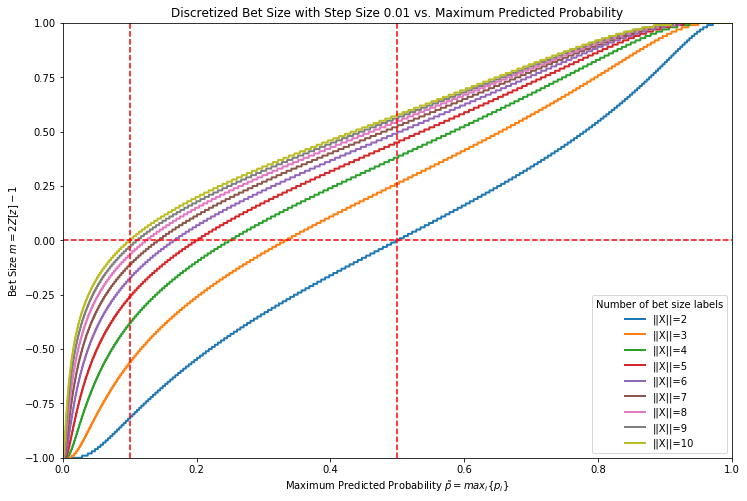

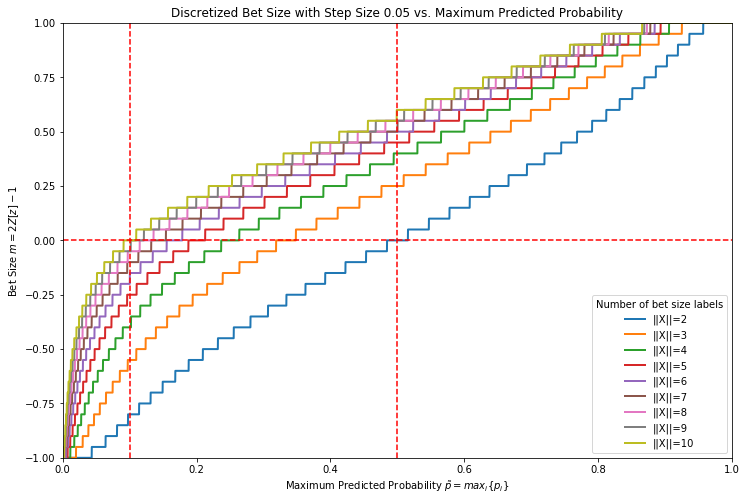

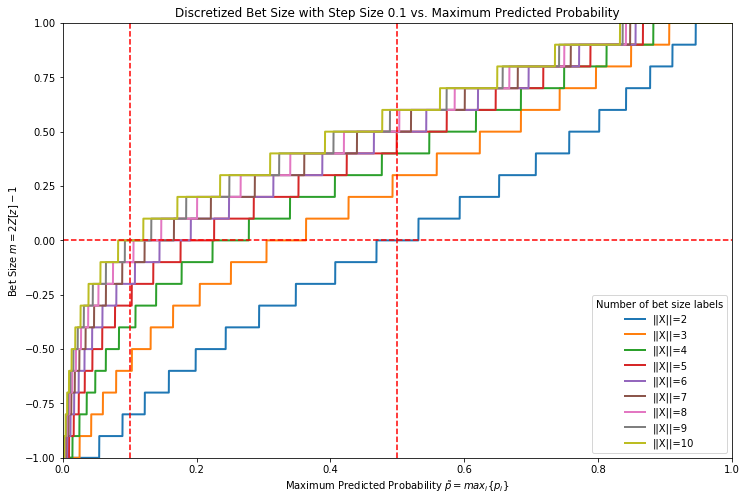

In [11]:
for step in steps:
    plt.figure(figsize=(12,8))
    for cls in class_labels:

        X["Z_score"] = X["prob"].apply(lambda prob: (prob - 1/cls) / (prob * (1 - prob))**0.5)
        X["bet_size_prob"] = X["Z_score"].apply(lambda x: 2 * norm.cdf(x) - 1)
        X["D_bet_size_prob"] = rs.discrete_signal(signal0 = X["bet_size_prob"], step_size = step)
        plt.plot(X["prob"],X["D_bet_size_prob"], label=f"||X||={cls}", linewidth=2, alpha=1)
    
    plt.ylim(-1, 1)
    plt.xlim(0, 1) #our lowest was only 1e-3, not negative
    plt.axhline(y=0, c='r',ls='--')
    plt.axvline(x=0.1, c='r',ls='--') # predict prob = 0.1
    plt.axvline(x=0.5, c='r',ls='--') # predict prob = 0.5
    plt.ylabel("Bet Size $m=2Z[z]-1$")
    plt.xlabel(r"Maximum Predicted Probability $\tilde{p}=max_i${$p_i$}")
    plt.title("Discretized Bet Size with Step Size {0} vs. Maximum Predicted Probability".format(step))
    plt.legend(title="Number of bet size labels")
    plt.show()

**Note**

Notice as step size gets larger it requires less predicted probabilities to generate a signal.

Hence step size should be around 0.01 to prevent such "rounding" errors while giving a more "decisive" signal.

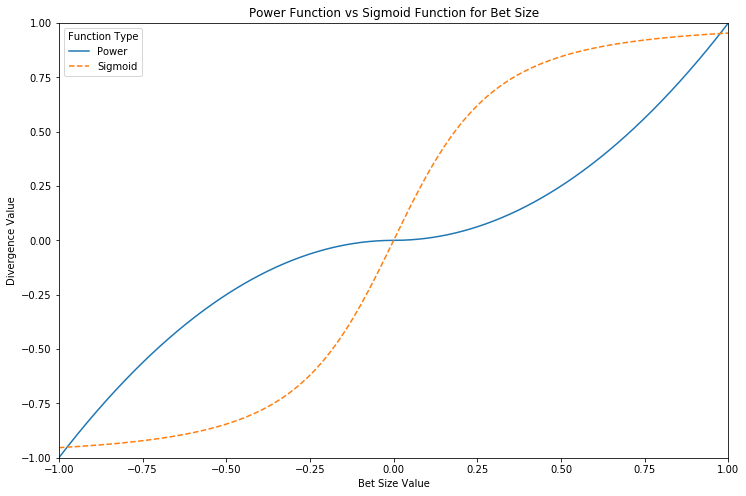

In [12]:
market_price, forecast_price, width_params = 100., 115., {'divergence': 10, 'm_bet_size': .95}
n_points = 1000
X = np.linspace(-1.0, 1.0, 1000)

def _bet_size(width_coef, price_dvg):
    return price_dvg * ((width_coef + price_dvg ** 2) ** (-0.5))

def _bet_size_power(width_coef, price_dvg):
    return np.sign(price_dvg) * abs(price_dvg) ** width_coef

w = 2
power_function = np.array([_bet_size_power(2, xi) for xi in X])
sigmoid_function = np.array([_bet_size(0.1, xi) for xi in X])
bet_size_df = pd.DataFrame({'power': power_function, 'sigmoid': sigmoid_function})
plt.figure(figsize=(12,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.plot(X, bet_size_df["power"], label ="Power")
plt.plot(X, bet_size_df["sigmoid"], label = "Sigmoid", ls="--")
plt.ylabel("Divergence Value")
plt.xlabel("Bet Size Value")
plt.title("Power Function vs Sigmoid Function for Bet Size")
plt.legend(title = "Function Type")
plt.show()


**Note**

The above answer is purely experimental. But it is somewhat important for long short strategist.

When we set limit price its based on side, which will reflected in our positions.

**Note**

Congrats! You are done with research, time for backtest!